# Tugas Klasifikasi (Data Mining 2)

Tanggal Pembuatan Awal : 08 November 2024

Tanggal Perbaikan :

### Kelompok 1
1. Alifa Salsabila (2308138)
2. Muhammad Bintang Eighista (2304137)
3. Nina Wulandari (2312091)
4. Putra Aditya Simbolon (2305839)
5. Yahyo Abdullozoda (2313368)


# Latar Belakang

Analisis prediksi perilaku pelanggan dalam sebuah toko online dapat memberikan keuntungan yang signifikan. Dalam konteks ini, mengetahui kemungkinan seorang pengunjung akan melakukan pembelian memungkinkan penyesuaian strategi penjualan. Misalnya, untuk pelanggan dengan peluang tinggi melakukan pembelian, toko dapat menawarkan produk-produk populer untuk mendorong upselling. Sebaliknya, untuk pelanggan dengan kemungkinan rendah, kupon atau insentif lain bisa diberikan guna meningkatkan motivasi belanja. Prediksi ini menggunakan metode data mining, yang memungkinkan analisis data besar dan memberikan jawaban prediktif mengenai peluang suatu pembelian secara efisien. Dalam kompetisi DATA MINING CUP (DMC) 2013, tujuan utamanya adalah untuk meramalkan apakah pengunjung akan melakukan pembelian berdasarkan data sesi dan transaksi historis.

## Tujuan:
1. Membangun model prediksi pesanan menggunakan data sesi historis.
2. Mengenali pola perilaku pelanggan yang meningkatkan kemungkinan pembelian.
3. Menghasilkan prediksi probabilitas (0 hingga 1) untuk setiap sesi, di mana 0 menunjukkan tidak ada pesanan dan 1 menunjukkan pesanan dilakukan.
4. Meminimalkan kesalahan prediksi untuk mendekati hasil aktual.
5. Mendukung optimalisasi strategi toko online guna meningkatkan konversi dan pengalaman belanja pelanggan.

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2. DATASET YANG DIGUNAKAN

## transact_train
* Deskripsi: File ini adalah data pelatihan yang berisi semua kolom (data arrays) yang dijelaskan dalam dokumen features.pdf, termasuk kolom target order.

* Kolom order: Kolom order menunjukkan apakah sesi tersebut menghasilkan pembelian (y untuk pembelian, n untuk tidak ada pembelian). Ini merupakan target yang ingin diprediksi.

* Kegunaan: Digunakan untuk melatih model. Model akan belajar dari data ini untuk memahami pola-pola yang mengarah pada terjadinya atau tidak terjadinya pembelian.


In [2]:
transact_train = pd.read_csv('DMC//transact_train.csv', sep=',')

In [3]:
transact_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.00,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.94,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39887.00,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.00,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15633.00,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [4]:
transact_train.tail()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
429008,49998,18,7,5988882.0,77,9.99,149.99,5253.28,3,49.95,...,?,?,?,?,?,?,?,?,?,n
429009,49999,18,7,675114.0,6,59.0,199.99,509.96,1,89.99,...,?,25038,?,?,?,0,24,1,4,n
429010,49999,18,7,715341.0,7,59.0,649.99,1159.95,1,89.99,...,completely orderable,25038,?,?,?,0,24,1,4,n
429011,50000,18,7,0.0,1,6.99,6.99,6.99,1,6.99,...,?,47,300,537,5,0,53,1,34,n
429012,50000,18,7,82943.0,1,6.99,6.99,6.99,1,6.99,...,completely orderable,47,300,537,5,0,53,1,34,n


# 3. Pra-Proses

## Dimensi Dataset

In [78]:
transact_train.shape

(429013, 24)

Menampilkan jumlah baris dan kolom dalam DataFrame transact_train
Hasilnya berupa tuple (baris, kolom), yang menunjukkan ukuran dataset yaitu terdiri dari 408662 baris dan 24 kolom

In [6]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

Menampilkan informasi mengenai struktur data transact_train dengan type datanya.
Ada beberapa kolom yang type datanya tidak sesuai yaitu:
- cMinPrice
- cMaxPrice
- cSumPrice
- bMinPrice
- bMaxPrice
- bSumPrice
- bStep
- onlineStatus
- availability
- maxVal
- customerScore
- accountLifetime
- payments
- age
- address
- lastOrder
- order

|No | Nama Kolom | Deskripsi    | Rentang Nilai | Missing Value |
|:-:|:-----------|:-------------|:--------------|:--------------|
|1| sessionNo  | Nomor urut sesi | Bilangan Asli | Tidak  |
|2| startHours | Jam dimulainya sesi | Bilangan asli antara 0 dan 23 | Tidak |
|3| startWeekday| Hari saat sesi dimulai (1=Senin, ..., 7=Minggu) | Bilangan asli dalam {1, 2, 3, 4, 5, 6, 7} | Tidak |
|4| duration| Durasi dalam detik sejak sesi dimulai      | Bilangan desimal tak-negatif        | Tidak |
|5| cCount | Jumlah produk yang diklik | Bilangan asli | Tidak |
|6| cMinPrice | Harga terendah dari produk yang diklik | Bilangan desimal tak-negatif | Ya |
|7| cMaxPrice | Harga tertinggi dari produk yang diklik | Bilangan desimal tak-negatif | Ya |
|8| cSumPrice | Jumlah harga dari semua produk yang diklik | Bilangan desimal tak-negatif | Ya |
|9| bCount | Jumlah produk yang dimasukkan ke keranjang | Bilangan asli | Tidak |
|10| bMinPrice | Harga terendah dari produk di keranjang | Bilangan desimal tak-negatif | Ya |
|11| bMaxPrice | Harga tertinggi dari produk di keranjang | Bilangan desimal tak-negatif | Ya |
|12| bSumPrice | Jumlah harga dari semua produk di keranjang | Bilangan desimal tak-negatif | Ya |
|13| bStep | Langkah pemrosesan pembelian | Bilangan asli dalam {1, 2, 3, 4, 5} | Ya |
|14| onlineStatus | Status online pelanggan (y=ya, n=tidak) | String | Ya |
|15| availability | Status pengiriman | String | Ya |
|16| customerID | ID pelanggan | String | Ya |
|17| maxVal | Harga pembelian maksimum yang diperbolehkan untuk pelanggan | Bilangan asli | Ya |
|18| customerScore | Evaluasi pelanggan dari sudut pandang toko | Bilangan asli | Ya |
|19| accountLifetime | Lama akun pelanggan dalam bulan | Bilangan asli | Ya |
|20| payments | Jumlah pembayaran yang dilakukan oleh pelanggan | Bilangan asli | Ya |
|21| age | Usia pelanggan | Bilangan asli | Ya |
|22| address | Bentuk sapaan pelanggan (1=Tuan, 2=Ny, 3=Perusahaan) | Bilangan asli dalam {1, 2, 3} | Ya |
|23| lastOrder | Waktu dalam hari sejak pesanan terakhir | Bilangan asli | Ya |
|24| order | Hasil sesi (y=pembelian, n=tidak ada pembelian) | Karakter | Tidak |

In [7]:
transact_train['sessionNo'] = transact_train['sessionNo'].astype(int)
transact_train['startHour'] = transact_train['startHour'].astype(int)
transact_train['startWeekday'] = transact_train['startWeekday'].astype(int)
transact_train['duration'] = transact_train['duration'].astype(float)
transact_train['cCount'] = transact_train['cCount'].astype(int)
transact_train['cMinPrice'] = pd.to_numeric(transact_train['cMinPrice'], errors='coerce')
transact_train['cMaxPrice'] = pd.to_numeric(transact_train['cMaxPrice'], errors='coerce')
transact_train['cSumPrice'] = pd.to_numeric(transact_train['cSumPrice'], errors='coerce')
transact_train['bCount'] = transact_train['bCount'].astype(int)
transact_train['bMinPrice'] = pd.to_numeric(transact_train['bMinPrice'], errors='coerce')
transact_train['bMaxPrice'] = pd.to_numeric(transact_train['bMaxPrice'], errors='coerce')
transact_train['bSumPrice'] = pd.to_numeric(transact_train['bSumPrice'], errors='coerce')
transact_train['bStep'] = pd.to_numeric(transact_train['bStep'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['onlineStatus'] = transact_train['onlineStatus'].astype('category')
transact_train['availability'] = transact_train['availability'].astype('category')
transact_train['customerNo'] = transact_train['customerNo'].astype('string')
transact_train['maxVal'] = pd.to_numeric(transact_train['maxVal'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['customerScore'] = pd.to_numeric(transact_train['customerScore'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['accountLifetime'] = pd.to_numeric(transact_train['accountLifetime'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['payments'] = pd.to_numeric(transact_train['payments'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['age'] = pd.to_numeric(transact_train['age'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['address'] = pd.to_numeric(transact_train['address'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['lastOrder'] = pd.to_numeric(transact_train['lastOrder'], errors='coerce').fillna(np.nan).astype('Int64')
transact_train['order'] = transact_train['order'].astype('category')


Kolom kolom yang tipe datanya tidak sesuai diubah manjadi tipe data yang sesuai. 
- kolom cMinPrice dari string ke float
- kolom cMaxPrice dari string ke float
- kolom cSumPrice dari string ke float
- kolom bMinPrice dari string ke float
- kolom bMaxPrice dari string ke float
- kolom bSumPrice dari string ke float
- kolom bStep dari string ke int
- kolom onlineStatus dari string ke category
- kolom availability dari string ke category
- kolom maxVal dari string ke int
- kolom customerScore dari string ke int
- kolom accountLifetime dari string ke int
- kolom payments dari string ke int
- kolom age dari string ke int
- kolom address dari string ke int
- kolom lastOrder dari string ke int
- kolom order dari string ke category

In [8]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   sessionNo        429013 non-null  int32   
 1   startHour        429013 non-null  int32   
 2   startWeekday     429013 non-null  int32   
 3   duration         429013 non-null  float64 
 4   cCount           429013 non-null  int32   
 5   cMinPrice        426248 non-null  float64 
 6   cMaxPrice        426248 non-null  float64 
 7   cSumPrice        426248 non-null  float64 
 8   bCount           429013 non-null  int32   
 9   bMinPrice        423883 non-null  float64 
 10  bMaxPrice        423883 non-null  float64 
 11  bSumPrice        423883 non-null  float64 
 12  bStep            237680 non-null  Int64   
 13  onlineStatus     429013 non-null  category
 14  availability     429013 non-null  category
 15  customerNo       429013 non-null  string  
 16  maxVal           275

diatas ialah informasi mengenai kolom yang tipe datanya sudah diubah

## Cek jumlah dan persentase missing value

In [9]:
transact_train = transact_train.replace('?', None)

In [10]:
print('Jumlah Missing Value')
print(transact_train.isnull().sum())

print()

print('Persentase Missing Value')
print(transact_train.isnull().sum()/transact_train.shape[0] * 100)

Jumlah Missing Value
sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bCount                  0
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
order                   0
dtype: int64

Persentase Missing Value
sessionNo           0.000000
startHour           0.000000
startWeekday        0.000000
duration            0.000000
cCount              0.000000
cMinPrice           0.644503
cMaxPrice           0.644503
cSumPrice           0.644503
bCount              0.000000
bMinPrice           1.195768
bMaxPrice           1.1957

Diatas adalah informasi mengenai missing value dari setiap kolom, bisa dilihat berdasarkan informasi di atas ada beberapa kolom yang perlu di perbaiki missing value nya

In [11]:
# Fungsi untuk mengisi missing value pada kolom bStep
def fill_bStep(df):
    for i, row in df.iterrows():
        if pd.isna(row['bStep']):  # Cek apakah bStep adalah NaN
            if row['order'] == 'y':
                # Dapatkan indeks dari baris dengan missing bStep untuk 'order' y
                missing_indices = df[(df['order'] == 'y') & (df['bStep'].isna())].index
                if len(missing_indices) == 1:
                    df.at[missing_indices[0], 'bStep'] = 5
                else:
                    # Isi dengan 1 hingga n-1, dan yang terakhir dengan 5
                    for j, idx in enumerate(missing_indices):
                        if j == len(missing_indices) - 1:
                            df.at[idx, 'bStep'] = 5
                        else:
                            df.at[idx, 'bStep'] = j + 1
            elif row['order'] == 'n':
                # Isi semua missing bStep untuk order 'n' dengan 1
                df.loc[(df['order'] == 'n') & (df['bStep'].isna()), 'bStep'] = 1
    return df

# Terapkan fungsi ke DataFrame
transact_train = fill_bStep(transact_train)



Proses ini bertujuan untuk mengisi nilai missing value yang ada pada kolom bStep di dataset dalam setiap sesi dengan ketentuan berikut:

Untuk order yang bernilai 'y':
Jika hanya ada satu nilai missing di kolom bStep, nilai tersebut diisi dengan angka 5.
Jika ada lebih dari satu nilai missing, nilai pertama diisi dengan angka 1, nilai berikutnya bertambah satu, dan nilai terakhir diisi dengan angka 5.

Sedangkan, untuk order yang bernilai 'n':
Semua nilai missing pada kolom bStep diisi dengan angka 1.
Setelah pengisian dilakukan, kita memeriksa kembali apakah masih ada nilai missing yang tersisa di kolom bStep untuk memastikan bahwa proses pengisian telah berhasil.

In [12]:
# Menampilkan jumlah missing value pada kolom 'bStep'
missing_bStep_count = transact_train['bStep'].isna().sum()
print("Jumlah missing value pada bStep:", missing_bStep_count)

Jumlah missing value pada bStep: 0


Setelah mengubah nilai missing di kolom bStep, tidak ada lagi nilai missing. Dengan demikian, jumlah nilai missing pada kolom bStep menjadi 0

## Grouping Dataset berdasarkan sesi

In [13]:
def groupData(data, field):
    grouped = data.groupby(field)
    splitted = [group for _, group in grouped]
    return splitted

In [14]:
split_by_session = groupData(transact_train, 'sessionNo')

Selanjutnya kami mengelompokkan data berdasarkan sessionNo. Hasil pengelompokan ini dipecah menjadi beberapa bagian, di mana setiap bagian berisi data yang hanya terkait dengan satu nilai unik dari kolom tersebut. Keluaran akhirnya berupa daftar yang berisi setiap kelompok data tersebut, sehingga mudah diakses atau dianalisis per sessionnya.

## Mengakses Data pada Sesi Tertentu

In [15]:
def get_session_data(splitted, n):
    return splitted[n-1]

In [16]:
# Contoh penggunaan:
get_session_data(split_by_session, 123) #menampilkan data sesi ke 2

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
801,123,6,5,206081.00,5,29.99,329.99,699.96,1,29.99,...,NaN,49,900,80,93,4,42,2,31,y
802,123,6,5,230.83,7,29.99,329.99,1299.94,2,29.99,...,NaN,49,900,80,93,4,42,2,31,y
803,123,6,5,276052.00,8,29.99,329.99,1344.93,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
804,123,6,5,341508.00,8,29.99,329.99,1344.93,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
805,123,6,5,370494.00,8,29.99,329.99,1344.93,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
806,123,6,5,379331.00,8,29.99,329.99,1344.93,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
807,123,6,5,420735.00,8,29.99,329.99,1344.93,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
808,123,6,5,457418.00,9,29.99,329.99,1374.92,2,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y
809,123,6,5,501715.00,12,29.99,329.99,1494.89,3,29.99,...,NaN,49,900,80,93,4,42,2,31,y
810,123,6,5,508893.00,12,29.99,329.99,1494.89,3,29.99,...,completely orderable,49,900,80,93,4,42,2,31,y


Kemudian kami mengakses data dari sesi tertentu dalam daftar data yang sudah dikelompokkan sebelumnya (splitted). Fungsi ini mengambil nomor sesi (n) dan menggunakan angka tersebut untuk menemukan data sesi yang diinginkan dalam daftar. Diatas juga terdapat contoh penggunaannya.

In [17]:
def groupBy(splitted):
    processed_sessions = []
    
    for session in splitted:
        tmpSession = session.iloc[-1].copy()
        
        # Filter nilai non-NA menggunakan notna()
        cMinPrice_filtered = session['cMinPrice'][session['cMinPrice'].notna()].tolist()
        cMaxPrice_filtered = session['cMaxPrice'][session['cMaxPrice'].notna()].tolist()
        cSumPrice_filtered = session['cSumPrice'][session['cSumPrice'].notna()].tolist()
        bMinPrice_filtered = session['bMinPrice'][session['bMinPrice'].notna()].tolist()
        bMaxPrice_filtered = session['bMaxPrice'][session['bMaxPrice'].notna()].tolist()
        bSumPrice_filtered = session['bSumPrice'][session['bSumPrice'].notna()].tolist()
        bStep_filtered = session['bStep'][session['bStep'].notna()].tolist()
        availability_filtered = session['availability'][session['availability'].notna()].tolist()
        maxVal_filtered = session['maxVal'][session['maxVal'].notna()].tolist()
        customerScore_filtered = session['customerScore'][session['customerScore'].notna()].tolist()
        accountLifetime_filtered = session['accountLifetime'][session['accountLifetime'].notna()].tolist()
        payments_filtered = session['payments'][session['payments'].notna()].tolist()
        age_filtered = session['age'][session['age'].notna()].tolist()
        address_filtered = session['address'][session['address'].notna()].tolist()
        lastOrder_filtered = session['lastOrder'][session['lastOrder'].notna()].tolist()
        
        # Mengisi nilai berdasarkan hasil filter
        tmpSession['cMinPrice'] = min(cMinPrice_filtered) if cMinPrice_filtered else None
        tmpSession['cMaxPrice'] = max(cMaxPrice_filtered) if cMaxPrice_filtered else None
        tmpSession['cSumPrice'] = cSumPrice_filtered[-1] if cSumPrice_filtered else None
        tmpSession['bMinPrice'] = min(bMinPrice_filtered) if bMinPrice_filtered else None
        tmpSession['bMaxPrice'] = max(bMaxPrice_filtered) if bMaxPrice_filtered else None
        tmpSession['bSumPrice'] = bSumPrice_filtered[-1] if bSumPrice_filtered else None
        tmpSession['bStep'] = stats.mode(bStep_filtered)[0][0] if bStep_filtered else None
        tmpSession['availability'] = stats.mode(availability_filtered)[0][0] if availability_filtered else None
        tmpSession['maxVal'] = max(maxVal_filtered) if maxVal_filtered else None
        tmpSession['customerScore'] = sum(customerScore_filtered)/len(customerScore_filtered) if customerScore_filtered else None
        tmpSession['accountLifetime'] = max(accountLifetime_filtered) if accountLifetime_filtered else None
        tmpSession['payments'] = max(payments_filtered) if payments_filtered else None
        tmpSession['age'] = max(age_filtered) if age_filtered else None
        tmpSession['address'] = stats.mode(address_filtered)[0][0] if address_filtered else None
        tmpSession['lastOrder'] = max(lastOrder_filtered) if lastOrder_filtered else None
        
        processed_sessions.append(tmpSession)
    
    allSession = pd.concat(processed_sessions, axis=1).T if processed_sessions else pd.DataFrame()
    return allSession

Fungsi ini dilakukan untuk memproses kumpulan data yang telah dipisahkan menjadi tiap sesi (dalam variabel splitted). Fungsi ini berfokus pada pengisian nilai yang hilang (missing values) dalam setiap sesi berdasarkan beberapa aturan logika dan kemudian menggabungkan hasil pemrosesan untuk setiap sesi menjadi satu dataset.

Pertama kita memulai dengan iterasi untuk setiap sesi dalam daftar splitted. Untuk setiap sesi, fungsi mengambil salinan dari baris terakhir sebagai referensi untuk pengisian nilai-nilai yang hilang.

Kemudian kita filter Data Non-NA dengan cara setiap kolom yang relevan dalam sesi (seperti harga, langkah, status, dan lainnya) akan difilter untuk menghilangkan nilai yang hilang (missing values). Nilai yang tersisa akan disimpan dalam daftar terpisah.

Setelah memfilter nilai yang valid, kita mengisi nilai yang hilang (missing values) pada kolom-kolom tertentu:
Untuk kolom harga (misalnya harga minimum dan maksimum), fungsi akan mengisi dengan nilai terkecil atau terbesar dari data yang ada. Untuk kolom dengan data numerik (misalnya skor pelanggan), nilai rata-rata dihitung dan digunakan untuk menggantikan nilai yang hilang. Untuk kolom kategorikal (seperti langkah atau status ketersediaan), fungsi menggunakan nilai yang paling sering muncul (mode) untuk mengganti nilai yang hilang. Beberapa kolom lain diisi dengan nilai terakhir yang tersedia jika ada.

Setiap hasil pemrosesan sesi yang telah diperbarui dengan nilai yang hilang digabungkan kembali ke dalam list processed_sessions. Setelah pemrosesan semua sesi, hasil akhir adalah penggabungan seluruh sesi yang telah diperbarui ke dalam satu DataFrame menggunakan pd.concat.


In [18]:
allSession = groupBy(split_by_session)

In [19]:
allSession['sessionNo'] = allSession['sessionNo'].astype(int)
allSession['startHour'] = allSession['startHour'].astype(int)
allSession['startWeekday'] = allSession['startWeekday'].astype(int)
allSession['duration'] = allSession['duration'].astype(float)
allSession['cCount'] = allSession['cCount'].astype(int)
allSession['cMinPrice'] = pd.to_numeric(allSession['cMinPrice'], errors='coerce')
allSession['cMaxPrice'] = pd.to_numeric(allSession['cMaxPrice'], errors='coerce')
allSession['cSumPrice'] = pd.to_numeric(allSession['cSumPrice'], errors='coerce')
allSession['bCount'] = allSession['bCount'].astype(int)
allSession['bMinPrice'] = pd.to_numeric(allSession['bMinPrice'], errors='coerce')
allSession['bMaxPrice'] = pd.to_numeric(allSession['bMaxPrice'], errors='coerce')
allSession['bSumPrice'] = pd.to_numeric(allSession['bSumPrice'], errors='coerce')
allSession['bStep'] = pd.to_numeric(allSession['bStep'], errors='coerce').fillna(np.nan).astype('Int64')

allSession['onlineStatus'] = allSession['onlineStatus'].map({'y': 1, 'n': 0})
allSession['onlineStatus'] = allSession['onlineStatus'].fillna(-1).astype(int)

allSession['availability'] = allSession['availability'].map({'completely not determinable': 1, 
                                                             'completely not orderable': 2,
                                                             'completely orderable' : 3,
                                                             'mainly not determinable' : 4,
                                                             'mainly not orderable' : 5,
                                                             'mainly orderable': 6,
                                                             'mixed' : 7
                                                            })
allSession['availability'] = allSession['availability'].fillna(-1).astype(int)


allSession['maxVal'] = pd.to_numeric(allSession['maxVal'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['customerScore'] = pd.to_numeric(allSession['customerScore'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['accountLifetime'] = pd.to_numeric(allSession['accountLifetime'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['payments'] = pd.to_numeric(allSession['payments'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['age'] = pd.to_numeric(allSession['age'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['address'] = pd.to_numeric(allSession['address'], errors='coerce').fillna(np.nan).astype('Int64')
allSession['lastOrder'] = pd.to_numeric(allSession['lastOrder'], errors='coerce').fillna(np.nan).astype('Int64')

allSession['order'] = allSession['order'].map({'y': 1, 'n': 0})
allSession['order'] = allSession['order'].fillna(-1).astype(int)

Disini kita mengubah tipe data dari beberapa kolom ke tipe data yang sesuai, seperti int, float, atau Int64 (untuk memungkinkan NaN pada kolom integer). Untuk kolom boolean-like (onlineStatus, order), nilai NaN diganti dengan -1, dan y/n dikonversi ke 1 dan 0.
Selain itu, kita lakukan pemetaan nilai kategori dari 2 kolom, yaitu:
   - Kolom onlineStatus dan order diubah dari y/n menjadi 1 dan 0, dengan NaN diisi -1.
   - Kolom availability mengonversi beberapa kategori ke nilai numerik antara 1 dan 7 agar lebih mudah diproses.


In [20]:
allSession = allSession.drop(columns='customerNo')

In [21]:
allSession

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
2,1,6,5,39887.0,1,59.99,59.99,59.99,1,59.99,...,1,3,600,70,21,1,43,1,49,1
7,2,6,5,94469.0,0,NaN,NaN,NaN,0,NaN,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
12,3,6,5,341613.0,11,9.99,29.99,109.95,2,9.99,...,1,3,1800,475,302,12,45,1,11,1
14,4,6,5,42812.0,4,4.99,4.99,19.96,1,4.99,...,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
22,5,6,5,2816046.0,45,12.99,179.95,1093.72,4,19.99,...,1,3,800,503,18,1,46,1,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429003,49996,18,7,7271812.0,197,6.99,59.99,4315.03,13,9.99,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
429005,49997,18,7,667219.0,8,70.99,89.99,667.88,1,89.99,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
429008,49998,18,7,5988882.0,77,9.99,149.99,5253.28,3,49.95,...,-1,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
429010,49999,18,7,715341.0,7,59.00,649.99,1159.95,1,89.99,...,1,3,<NA>,<NA>,<NA>,0,24,1,4,0


## 4. Exploratory Data Analysis(EDA)

In [22]:
allSession.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 2 to 429012
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sessionNo        50000 non-null  int32  
 1   startHour        50000 non-null  int32  
 2   startWeekday     50000 non-null  int32  
 3   duration         50000 non-null  float64
 4   cCount           50000 non-null  int32  
 5   cMinPrice        49682 non-null  float64
 6   cMaxPrice        49682 non-null  float64
 7   cSumPrice        49682 non-null  float64
 8   bCount           50000 non-null  int32  
 9   bMinPrice        49325 non-null  float64
 10  bMaxPrice        49325 non-null  float64
 11  bSumPrice        49325 non-null  float64
 12  bStep            50000 non-null  Int64  
 13  onlineStatus     50000 non-null  int32  
 14  availability     50000 non-null  int32  
 15  maxVal           27046 non-null  Int64  
 16  customerScore    27046 non-null  Int64  
 17  accountLife

In [23]:
allSession.describe().T

,count,mean,std,min,25%,50%,75%,max
sessionNo,50000.0,2.500050e+04,1.443390e+04,1.0,12500.75,25000.500,3.750025e+04,50000.00
startHour,50000.0,1.436706e+01,4.638547e+00,0.0,11.00,15.000,1.800000e+01,23.00
startWeekday,50000.0,5.923140e+00,7.950630e-01,5.0,5.00,6.000,7.000000e+00,7.00
duration,50000.0,1.323678e+06,2.250373e+06,0.0,107588.25,559770.000,1.542970e+06,21580092.00
cCount,50000.0,2.023370e+01,2.843027e+01,0.0,4.00,10.000,2.400000e+01,200.00
cMinPrice,49682.0,7.211816e+01,1.761812e+02,0.0,7.00,14.990,3.999000e+01,5999.99
cMaxPrice,49682.0,1.576462e+02,2.953313e+02,0.0,24.99,49.990,1.299900e+02,6999.99
cSumPrice,49682.0,1.096643e+03,3.083224e+03,0.0,119.96,358.935,9.386375e+02,115742.00
bCount,50000.0,3.207580e+00,3.549983e+00,0.0,1.00,2.000,4.000000e+00,108.00
bMinPrice,49325.0,8.644482e+01,2.037392e+02,0.0,9.99,19.990,4.999000e+01,6999.99


Diatas merupakan ringkasan statistik dasar untuk setiap kolom numerik dalam data transact_train, seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil. Hasilnya ditampilkan dalam bentuk tabel yang sudah ditransposisi, sehingga setiap kolom data memiliki statistiknya tersusun secara vertikal untuk memudahkan pembacaan.

In [24]:
transact_train.describe(include = 'string').T

,count,unique,top,freq
customerNo,277915,25037,47,1248


Diatas adalah ringkasan statistik untuk kolom yang berisi data tipe string dalam transact_train. Statistik yang disediakan meliputi jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus. Hasilnya ditampilkan dalam bentuk tabel yang ditransposisi, sehingga setiap kolom string memiliki statistiknya tersusun secara vertikal untuk memudahkan pembacaan.

# Prediksi

In [25]:
# Misalkan n adalah 22, kita ingin memilih kolom dari kolom pertama hingga kolom ke-22
n = 22
X = allSession.iloc[:, :n]  # Memilih kolom dari kolom pertama hingga kolom ke-n
y = allSession['order']

# Bagi dataset secara stratified untuk menjaga distribusi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model XGBoost
model = xgb.XGBClassifier()

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Akurasi: 0.8417
Precision: 0.8432522102798826
Recall: 0.8417
F1-Score: 0.8418940124885034


                 sessionNo  startHour  startWeekday  duration    cCount  \
sessionNo         1.000000   0.131248      0.940104  0.005590  0.015385   
startHour         0.131248   1.000000     -0.205172  0.018912  0.054717   
startWeekday      0.940104  -0.205172      1.000000  0.001924 -0.002986   
duration          0.005590   0.018912      0.001924  1.000000  0.541862   
cCount            0.015385   0.054717     -0.002986  0.541862  1.000000   
cMinPrice        -0.045884  -0.022477     -0.040565 -0.087705 -0.181097   
cMaxPrice        -0.031395   0.006275     -0.035988  0.103277  0.025626   
cSumPrice        -0.010477   0.029873     -0.021278  0.239104  0.290690   
bCount            0.037320   0.031548      0.027365  0.345672  0.587676   
bMinPrice        -0.045647  -0.016171     -0.042304 -0.056401 -0.159040   
bMaxPrice        -0.039428  -0.010970     -0.037825  0.009393 -0.082016   
bSumPrice        -0.026758   0.001062     -0.028783  0.100049  0.073518   
bStep             0.05174

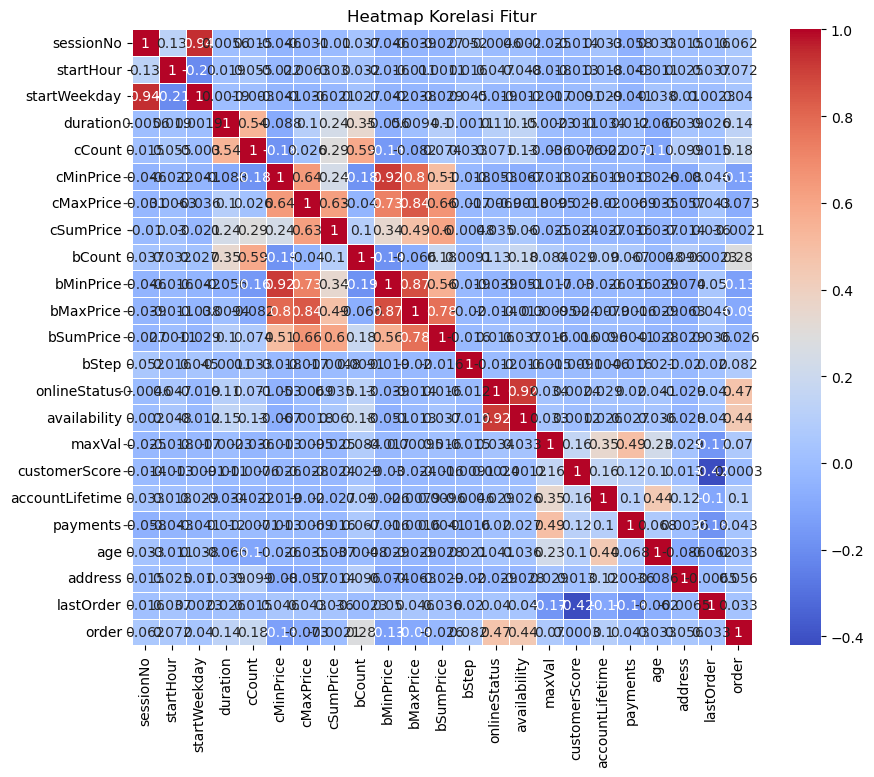

In [27]:
# Menghitung matriks korelasi
correlation_matrix = allSession.corr()

# Menampilkan matriks kortelasi
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa28bcbc-1aa3-4d64-9d5c-7b5e30059e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [32]:
df = pd.read_csv('datas_0.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6572 non-null   int64  
 1   sessionNo        6572 non-null   int64  
 2   startHour        6572 non-null   int64  
 3   startWeekday     6572 non-null   int64  
 4   duration         6572 non-null   float64
 5   cCount           6572 non-null   int64  
 6   cMinPrice        6572 non-null   float64
 7   cMaxPrice        6572 non-null   float64
 8   cSumPrice        6572 non-null   float64
 9   bCount           6572 non-null   int64  
 10  bMinPrice        6572 non-null   float64
 11  bMaxPrice        6572 non-null   float64
 12  bSumPrice        6572 non-null   float64
 13  bStep            6572 non-null   int64  
 14  onlineStatus     6572 non-null   int64  
 15  availability     6572 non-null   int64  
 16  maxVal           6572 non-null   int64  
 17  customerScore 

In [74]:
# Misalkan n adalah 22, kita ingin memilih kolom dari kolom pertama hingga kolom ke-22
n = 22
X = data_imputed_df.iloc[:, :n]  # Memilih kolom dari kolom pertama hingga kolom ke-n
y = data_imputed_df['order']

# Bagi dataset secara stratified untuk menjaga distribusi kelas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model XGBoost
model = xgb.XGBClassifier()

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Akurasi: 0.9033
Precision: 0.905807211578904
Recall: 0.9033
F1-Score: 0.903428186887811


In [39]:
df['availability']

0      -1
1       2
2       2
3       2
4      -1
       ..
6567   -1
6568   -1
6569    2
6570    2
6571    2
Name: availability, Length: 6572, dtype: int64

In [42]:
allSession

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
2,1,6,5,39887.0,1,59.99,59.99,59.99,1,59.99,...,1,3,600,70,21,1,43,1,49,1
7,2,6,5,94469.0,0,NaN,NaN,NaN,0,NaN,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
12,3,6,5,341613.0,11,9.99,29.99,109.95,2,9.99,...,1,3,1800,475,302,12,45,1,11,1
14,4,6,5,42812.0,4,4.99,4.99,19.96,1,4.99,...,1,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
22,5,6,5,2816046.0,45,12.99,179.95,1093.72,4,19.99,...,1,3,800,503,18,1,46,1,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429003,49996,18,7,7271812.0,197,6.99,59.99,4315.03,13,9.99,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
429005,49997,18,7,667219.0,8,70.99,89.99,667.88,1,89.99,...,1,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
429008,49998,18,7,5988882.0,77,9.99,149.99,5253.28,3,49.95,...,-1,-1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
429010,49999,18,7,715341.0,7,59.00,649.99,1159.95,1,89.99,...,1,3,<NA>,<NA>,<NA>,0,24,1,4,0


In [54]:
from copy import deepcopy

# Contoh penggunaan deepcopy
testing = deepcopy(allSession)


In [45]:
def removeMissing(data, field):
    data[field] = data[field].replace('?', float("NaN"))
    data.dropna(axis='index', inplace = True)

In [48]:
varsNum = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'maxVal', 
           'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']

for var in varsNum:
    removeMissing(testing, var)

In [66]:
len(testing)

50000

In [73]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Membuat objek IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Melakukan imputasi pada dataset
data_imputed = imputer.fit_transform(testing)

# # Mengubah kembali ke DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=testing.columns)

# print("Data asli dengan nilai yang hilang diimputasi:")
print(data_imputed_df.T)


                    0             1          2             3           4      \
sessionNo            1.00      2.000000       3.00      4.000000        5.00   
startHour            6.00      6.000000       6.00      6.000000        6.00   
startWeekday         5.00      5.000000       5.00      5.000000        5.00   
duration         39887.00  94469.000000  341613.00  42812.000000  2816046.00   
cCount               1.00      0.000000      11.00      4.000000       45.00   
cMinPrice           59.99     74.654019       9.99      4.990000       12.99   
cMaxPrice           59.99    150.648912      29.99      4.990000      179.95   
cSumPrice           59.99    844.298668     109.95     19.960000     1093.72   
bCount               1.00      0.000000       2.00      1.000000        4.00   
bMinPrice           59.99     91.018981       9.99      4.990000       19.99   
bMaxPrice           59.99    129.250476      29.99      4.990000       27.85   
bSumPrice           59.99    144.295966 

In [76]:
data_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sessionNo        50000 non-null  float64
 1   startHour        50000 non-null  float64
 2   startWeekday     50000 non-null  float64
 3   duration         50000 non-null  float64
 4   cCount           50000 non-null  float64
 5   cMinPrice        50000 non-null  float64
 6   cMaxPrice        50000 non-null  float64
 7   cSumPrice        50000 non-null  float64
 8   bCount           50000 non-null  float64
 9   bMinPrice        50000 non-null  float64
 10  bMaxPrice        50000 non-null  float64
 11  bSumPrice        50000 non-null  float64
 12  bStep            50000 non-null  float64
 13  onlineStatus     50000 non-null  float64
 14  availability     50000 non-null  float64
 15  maxVal           50000 non-null  float64
 16  customerScore    50000 non-null  float64
 17  accountLifet

In [77]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Contoh dataset dengan tipe data campuran
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],  # Integer
    'B': [5.0, np.nan, 2.0, 4.0, 1.0],  # Float
    'C': ['a', 'b', 'c', np.nan, 'e']  # Kategori (object)
})

# Mengubah kolom kategori menjadi kode numerik sementara
data['C'] = data['C'].astype('category').cat.codes.replace(-1, np.nan)

# Membuat objek IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Melakukan imputasi pada dataset
data_imputed = imputer.fit_transform(data)

# Mengubah kembali ke DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Mengembalikan tipe data asli
data_imputed_df['A'] = data_imputed_df['A'].astype(int)
data_imputed_df['C'] = data_imputed_df['C'].round().astype(int).replace(
    {code: category for category, code in enumerate(data['C'].astype('category').cat.categories)}
).astype('category')

print("Data asli dengan nilai yang hilang diimputasi:")
print(data_imputed_df)


Data asli dengan nilai yang hilang diimputasi:
   A         B  C
0  1  5.000000  0
1  2  3.240042  1
2  3  2.000000  2
3  4  4.000000  2
4  5  1.000000  3
